Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** and then **run all cells** (in the menubar, select Kernel$\rightarrow$Restart \& Run all). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [1]:
NAME = "Kevin Pham"

---

# Homework 9

Run the code given below to create 500 simulated 2-dimensional observations ```X``` and corresponding true labels ```y_true```. True labels range from 0 to 3. We're using 60\% of these data as our training data to fit the model and will reserve the remaining 200 points (40\% of 500) as our validation data. 

Also, we're creating a scatterplot of the data and indicating group membership by use of the four colors magenta (group 0), green (group 1), yellow (group 2), blue (group 3), respectively. The training data are shown as round circles, whereas the validation data are shown as stars. 

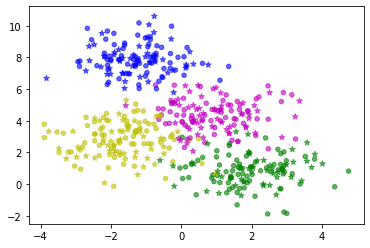

In [2]:
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=500, centers=4,
                                  cluster_std=1, center_box=(-10.0, 10.0), random_state=0) 


np.random.seed(11)
train_X, val_X, train_y, val_y = train_test_split(X, y_true, test_size=0.4)

fig, ax = plt.subplots()
colors = ('m', 'g', 'y', 'b')
ax.scatter(train_X[:, 0], train_X[:, 1], c = [colors[train_y[i]] for i in range(len(train_y))], s=20, alpha = 0.6)
ax.scatter(val_X[:, 0], val_X[:, 1], marker = "*", c = [colors[val_y[i]] for i in range(len(val_y))], alpha = 0.6); 

## Problem 1

(a) Consider the data train_X, train_y) that were simulated above to be your training data. Use the Gaussian Naive Bayes algorithm to predict the label color of the point x with coordinates (0,2) "by-hand" (that is, without using any SciKitLearn methods). Show your work. It's ok to use Numpy. You can compute multivariate normal densities using the ```scipy.stats``` module or by using your calculator. Please state which method you used in your answer.  

Optional code box:

In [3]:
# COMPLETE
# YOUR CODE HERE

# first, find sample mean vectors and sample covariance matrices of the four separate groups

import numpy as np
from scipy.stats import multivariate_normal # need the multivariate normal

means = [] # empty array for means
cov = [] # empty array for covariances
density = [] # empty array for densities

for i in range(4): # traverse through each group from (group 0 to group 3) -> 4 dists
    means.append(np.mean(train_X[train_y==i,:],axis=0)) # row-wise means per identified group
    cov.append(np.cov(train_X[train_y==i,:].T)) # covariance of each row per identified group
    var = multivariate_normal(means[i], cov[i]) # compute the multivariate Normal density at the given point (0,2) for each of the four distributions
    density.append(var.pdf((0,2))) # create a density for each group


colors[density.index(max(density))] # find color label for the group that produces the highest density value

#raise NotImplementedError()

'y'

Explain your code or show your work and state your answer here. If you are not using Python, but some other approach, make sure you explain how you come up with your answer. 

We start by finding the means and covariances of each respective group points to find the multivariate normal densities of each group at point (0,2). We then search for the highest density amongst the 4 groups to figure out which group was most likely the next color to that point. In this data, it is at position 2 in the index amongst the densities being the color 'yellow'.

(b) Use SciKit-Learn to fit the Gaussian Naive Bayes classification algorithm to all points in the training data and use it to predict a label for each point in the validation (or testing) data. Produce a scatterplot of the points in the validation data set, colored by the predicted group labels. 

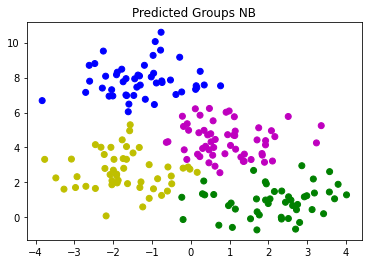

In [4]:
# COMPLETE
# YOUR CODE HERE

# import the appropriate package tools
from sklearn.naive_bayes import GaussianNB

# Using training data to fit the model
model = GaussianNB()
model.fit(train_X,train_y)

# prediction 'y'
y_hat = model.predict(val_X)

# setup the plot
fig = plt.figure()
ax = plt.axes()

col_p = [] # empty list for color predictions
for i in range(len(y_hat)): # traverse through each predicted color indices
    col_p.append(colors[y_hat[i]])



# plot it based off the colors assigned from y_hat (predictions)
ax.scatter(val_X[:,0],val_X[:,1],color = col_p);

# plot cosmetics 
ax.set_title("Predicted Groups NB");

# raise NotImplementedError()

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from (b)) to the true labels. Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the Gaussian Naive Bayes algorithm?

0.915

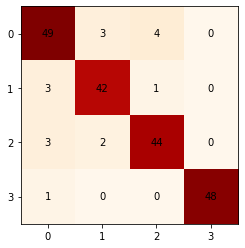

In [5]:
# COMPLETE
# YOUR CODE HERE
# CONFUSION MATRIX of PREDICTED to TRUE labels.

# import the appropriate package tools
from sklearn.metrics import confusion_matrix

# establish the matrix
con = confusion_matrix(val_y,y_hat,labels = [0,1,2,3]);

# establish heatmap
fig = plt.figure()
ax = plt.axes()

# make the heatmap
ax.imshow(con,cmap = 'OrRd')

# heatmap cosmetics
ax.set_xticks(np.arange(4)); # redo the ticks appropriately
ax.set_yticks(np.arange(4));

# inside labels
for i in range(4):
    for j in range(4):
        t = ax.text(j,i,con[i,j],ha = "center", va = "center");

# computing along the main diagonal of the confusion matrix
np.sum([con[i,i] for i in range(4)])/len(val_y)


# raise NotImplementedError()

Percentage of points predicted correctly: sum(along the main diagonal)/200 = 91.5% are classified correctly using the Gaussian Naive Bayes

## Problem 2

(a) Using the same training data simulated above (```train_X```) fit the k-means clustering algorithm (with k=4). Use the fitted model to cluster the validation data into k=4 clusters. For the resulting four clusters, use a majority vote over the true ```val_y``` labels to assign each cluster a label. 

**Hint:** we did something extremely similar in the clustering/classification of handwritten digits example we did in class. 

In [6]:
# COMPLETE
# YOUR CODE HERE
# import the appropriate package tools
from sklearn.cluster import KMeans
from scipy.stats import mode

# establish clustering for k=4 and fit it using the training data
k_mean = KMeans(n_clusters = 4) 
k_mean.fit(train_X)
# prediction
y_hat_means = k_mean.predict(val_X)

# create an array of clusters
k_label = np.zeros_like(y_hat_means)

# traverse through each cluster and take the most frequent 'true' label.
for i in range(4):
     k_label[i==y_hat_means] = mode(val_y[i==y_hat_means])[0] # matching per prediction to true val. First element is what we need.

# display it
print(k_label)

# raise NotImplementedError()

[1 1 3 0 2 1 0 0 3 2 0 2 0 3 2 1 2 0 0 1 1 1 1 1 1 1 2 1 1 1 1 2 0 0 2 2 2
 0 0 0 2 2 1 0 1 1 0 1 0 1 1 0 3 2 2 1 0 0 2 2 3 3 1 1 3 2 2 0 3 0 1 3 2 2
 3 2 0 3 3 3 2 3 1 3 0 0 3 2 1 0 1 3 1 0 1 2 3 0 0 1 0 2 2 0 3 2 2 3 0 3 0
 0 3 2 1 0 3 3 0 2 3 3 2 0 2 2 3 0 0 2 0 2 1 3 2 1 3 0 0 3 0 0 0 0 3 0 2 3
 3 1 3 3 1 2 1 2 0 3 2 3 2 1 0 0 2 3 3 0 2 1 0 1 2 3 0 2 3 0 3 1 3 0 1 1 0
 1 0 0 3 3 3 3 0 2 2 3 0 2 0 1]


(b) Produce another scatterplot showing the 200 points in ```val_X``` and use the labels produced in Problem 2 (a) to color the points. 

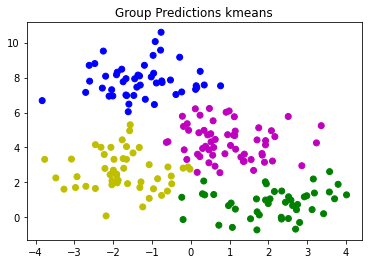

In [7]:
# COMPLETE
# YOUR CODE HERE
# establish plot
fig = plt.figure()
ax = plt.axes()

col_k = []
for i in range(len(k_label)): # traverse through each predicted color indices
    col_k.append(colors[k_label[i]])

# plot scatter
ax.scatter(val_X[:,0],val_X[:,1],color = col_k);

# scatter cosmetics
ax.set_title("Group Predictions kmeans"); # set a title



#raise NotImplementedError()

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 2 (b)) to the true labels ```val_y```.  Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the k-means algorithm (with following majority vote over true labels)?

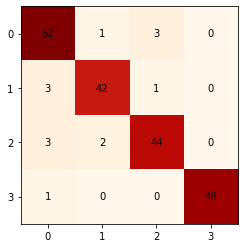

In [8]:
# COMPLETE
# YOUR CODE HERE
# CONFUSION MATRIX

con = confusion_matrix(val_y,k_label,labels = [0,1,2,3]); # establish the confusion matrix

# establish heatmap
fig = plt.figure()
ax = plt.axes()

# plot the heatmap
ax.imshow(con,cmap="OrRd")

# heatmap cosmetics
ax.set_xticks(np.arange(4)) # set ticks
ax.set_yticks(np.arange(4))

# inside labels
for i in range(4):
    for j in range(4):
        t = ax.text(j,i,con[i, j], ha="center", va="center");
# raise NotImplementedError()

Percentage predicted correctly: (52 + 42 + 44 + 48) / 200 = 0.93 -> 93% predicted correctly using k-means.

## Problem 3

(a) Use SciKit-Learn to fit a decision tree to the simulated training data ```(train_X, train_y)```. Set the ```max_depth``` of the tree to 3 (to make three nodes in your tree and end up with four different "leaves" on your tree). Use your fitted tree to predict the labels for the observations in the validation data. 

In [9]:
# COMPLETE
# YOUR CODE HERE
# retrieve appropriate package tools
from sklearn.tree import DecisionTreeClassifier, plot_tree
np.random.seed(10)

# establish the decision tree and fit it with the training sets
tree = DecisionTreeClassifier(max_depth = 3); 
tree_fit = tree.fit(train_X, train_y)

# prediction
tree_hat = tree.predict(val_X)
print(tree_hat) # display it
#raise NotImplementedError()


[1 1 3 0 2 1 0 0 3 2 0 2 0 3 2 1 2 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 2 2
 0 0 0 2 2 1 0 1 1 0 1 0 1 1 0 3 2 2 1 0 0 2 0 3 3 1 1 3 2 2 0 3 0 1 3 2 2
 3 2 0 3 3 3 0 3 1 3 0 0 3 2 1 0 1 3 1 0 1 2 3 0 0 1 0 2 2 0 3 2 2 3 0 3 0
 0 3 2 1 0 3 3 0 2 3 3 2 0 2 2 3 0 0 2 0 2 0 3 2 1 3 0 0 3 0 0 0 0 3 0 2 3
 3 1 3 3 1 2 1 0 0 3 2 3 2 1 0 0 2 3 3 0 2 1 0 1 2 3 0 2 3 0 3 1 3 0 1 1 0
 1 0 0 3 3 3 3 0 2 2 3 0 1 0 1]


(b) Produce another scatterplot showing the 200 points in ```val_X``` and use the labels produced by the Decision Tree procedure in Problem 4 (a) to color the points. 

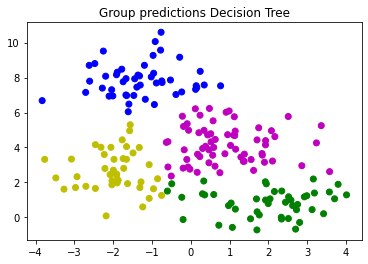

In [10]:
# COMPLETE
# YOUR CODE HERE

# establish plot
fig = plt.figure()
ax = plt.axes()

tree_lab = [] # for color labels
for i in range(len(tree_hat)): 
    tree_lab.append(colors[tree_hat[i]]) # match each prediction to its appropriate color
    
    
# create scatter
ax.scatter(val_X[:,0],val_X[:,1],color = tree_lab); 

# plot cosmetics
ax.set_title("Group predictions Decision Tree"); 
# raise NotImplementedError()

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 4 (a)) to the true labels ```val_y``` from our simulation. Which percentage of points are predicted correctly by the decision tree? Display your confusion matrix as a heat map like we did in class. 

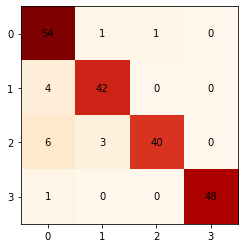

In [11]:
# COMPLETE
# YOUR CODE HERE
# CONFUSION MATRIX FOR DECISION TREES

con = confusion_matrix(val_y,tree_hat,labels = [0,1,2,3]); # establish the confusion matrix

# establish heatmap
fig = plt.figure()
ax = plt.axes()

# plot the heatmap
ax.imshow(con,cmap="OrRd")

# heatmap cosmetics
ax.set_xticks(np.arange(4)) # set ticks
ax.set_yticks(np.arange(4))

# inside labels
for i in range(4):
    for j in range(4):
        t = ax.text(j,i,con[i, j], ha="center", va="center");
# raise NotImplementedError()

#raise NotImplementedError()

Percentage: (54 + 42 + 40 + 48) / 200 = 0.92 -> 92% predicted correctly using Decision Trees.

## Problem 4

Describe what differences you observe between the three different methods you applied. What differences can you see in the three scatter plots in terms of shapes of predicted point clouds? Based on how the three different classification methods work, which one is expected to do best on differentiating between our simulated "blobs"? Which method works best on the simulated data? How can you tell how well the methods work? 

While it took a little observing due to how similar each scatterplot of the predictions looked, the k-means classification closely resembles our initial scatterplot in contrast to the other classifications. The kmeans classification was reinforced to be better based off the results as well standing at a 93% with the other contenders right behind at 92% for Decision Trees and 91.5% for Naive Bayes.